# 1주차 3교시 데이터 분석(EDA) 실습 과제
### 아래 설명을 읽고 질문에 답해주세요.   
#### 해당 과제에 대한 부담 없이 아래 코드의 순서를 따라와주시면서 데이터 분석과정에 대한 공부를 한다고 생각해주시면 됩니다☀️   
   
   ### 📍세션의 과제는 아래에 있습니다. 실습을 마친 후 실습완료하신 내용을 기반으로 과제를 수행 후 GitHub에 업로드 해주세요!📍



In [6]:
import pandas as pd
import numpy as np

# 데이터 로드
df = pd.read_csv(r'C:\Users\njh45\OneDrive\바탕 화면\TOBIGS_23기\1주차\week1_EDA_data.csv')

# 1. 결측치 처리
print("결측치 개수:\n", df.isnull().sum())
df.dropna(inplace=True)

# 2. 이상치 처리
# IQR 방식으로 이상치 탐지 및 제거 : 정수/실수형 컬럼만 진행
Q1_quantity = df['Quantity'].quantile(0.25)
Q3_quantity = df['Quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity

Q1_unitprice = df['UnitPrice'].quantile(0.25)
Q3_unitprice = df['UnitPrice'].quantile(0.75)
IQR_unitprice = Q3_unitprice - Q1_unitprice

df = df[
    (df['Quantity'] >= Q1_quantity - 1.5 * IQR_quantity) & (df['Quantity'] <= Q3_quantity + 1.5 * IQR_quantity) &
    (df['UnitPrice'] >= Q1_unitprice - 1.5 * IQR_unitprice) & (df['UnitPrice'] <= Q3_unitprice + 1.5 * IQR_unitprice)
]

# 3. Total_Amount 열 생성 : 합계니까 새로운 컬럼 생성
df['Total_Amount'] = df['Quantity'] * df['UnitPrice']
print("전처리 완료. 데이터 크기:", df.shape)

df

결측치 개수:
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
전처리 완료. 데이터 크기: (10000, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount
0,I07271,S089,Product 67,12,2023-09-20,17.305292,C0320,Australia,207.663508
1,I00861,S095,Product 4,12,2023-05-31,34.734999,C0246,UK,416.819989
2,I05391,S041,Product 96,-6,2023-07-31,36.367197,C0213,Australia,-218.203182
3,I05192,S081,Product 1,-8,2023-07-11,34.778332,C0443,France,-278.226653
4,I05735,S047,Product 34,18,2023-08-31,11.037961,C0276,Australia,198.683307
...,...,...,...,...,...,...,...,...,...
9995,I04678,S046,Product 46,10,2023-02-12,-2.337636,C0241,Australia,-23.376357
9996,I02219,S059,Product 80,11,2023-03-23,3.917652,C0103,USA,43.094167
9997,I01390,S070,Product 11,-3,2023-01-27,15.916445,C0297,Australia,-47.749335
9998,I04277,S008,Product 49,9,2023-10-31,8.130918,C0495,USA,73.178259


### 2. 기술통계 및 EDA
#### 요구사항
1. `UnitPrice`와 `Quantity`의 기술통계(평균, 중앙값, 표준편차)를 계산하시오.
2. `Country`별 `Total_Amount`의 합계를 계산하고, 상위 5개 국가를 출력하시오.
3. 다음 내용을 시각화하시오:
   - `UnitPrice`의 분포를 히스토그램으로 나타내기.
   - `Country`별 `Total_Amount`를 막대 그래프로 시각화하기.

기술통계:
           UnitPrice      Quantity
count  10000.000000  10000.000000
mean      22.457582      4.681100
std       15.917561      8.649629
min       -4.990898    -10.000000
25%        8.788993     -3.000000
50%       22.367911      5.000000
75%       36.291530     12.000000
max       49.994483     19.000000
상위 5개 국가:
 Country
France       231937.087319
Germany      220825.672623
UK           210195.166526
Australia    207078.422872
USA          202445.284760
Name: Total_Amount, dtype: float64


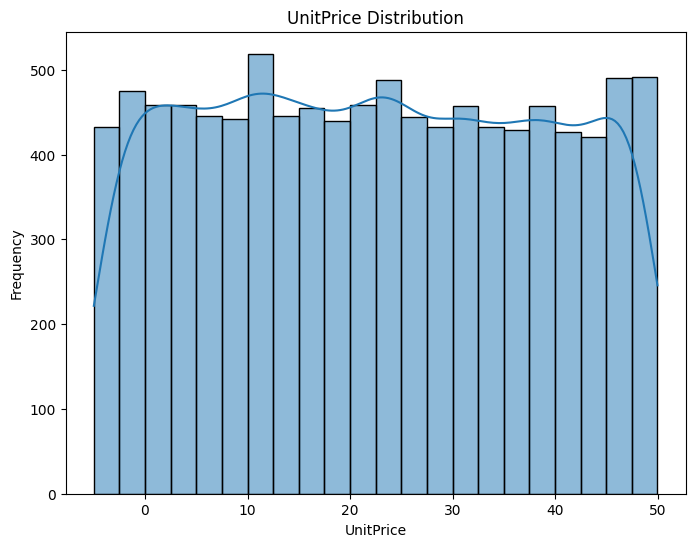

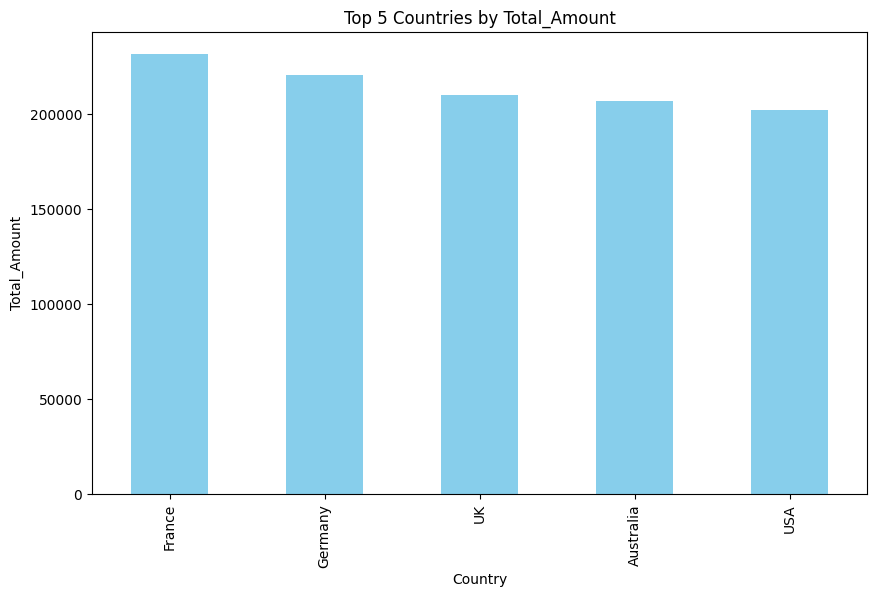

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 기술통계
print("기술통계:\n", df[['UnitPrice', 'Quantity']].describe())

# 2. Country별 Total_Amount 합계
country_sales = df.groupby('Country')['Total_Amount'].sum().sort_values(ascending=False).head(5)
print("상위 5개 국가:\n", country_sales)

# 3. 시각화
plt.figure(figsize=(8, 6))
sns.histplot(df['UnitPrice'], kde=True) # UnitPrice 분포
plt.title('UnitPrice Distribution')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
country_sales.plot(kind='bar', color='skyblue') # 상위 5개 국가 시각화
plt.title('Top 5 Countries by Total_Amount') 
plt.xlabel('Country')
plt.ylabel('Total_Amount')
plt.show()

### 3. 상관분석
#### 요구사항
1. `Quantity`와 `Total_Amount` 간의 상관계수를 계산하시오:
   - Pearson 상관계수와 Spearman 상관계수를 각각 계산하시오.
2. 상관분석 결과를 해석하시오:
   - 두 변수 간 관계가 강한지, 약한지, 선형 관계가 있는지 설명하시오.

In [7]:
from scipy.stats import pearsonr, spearmanr

# Pearson 상관계수
pearson_corr, _ = pearsonr(df['Quantity'], df['Total_Amount']) # _자리는 원래 p_value인데 사용하지 않음

# Spearman 상관계수
spearman_corr, _ = spearmanr(df['Quantity'], df['Total_Amount'])

print(f"Pearson Correlation: {pearson_corr}") # 강한 선형 관계를 지님
print(f"Spearman Correlation: {spearman_corr}") # 강한 단조 증가 관계를 지님

## 스피어만 계수가 좀 더 크므로 실제 X, Y의 관계는 비선형이 약간 섞인 단조 증가 관계

Pearson Correlation: 0.7764295146911375
Spearman Correlation: 0.8150877232931539


### 4. Feature Engineering
#### 요구사항
1. `InvoiceDate`에서 연도와 월을 추출하여 `Year`와 `Month` 열을 생성하시오.
2. 월별 `Total_Amount`의 합계를 계산하고, 시간에 따른 추세를 시각화하시오.

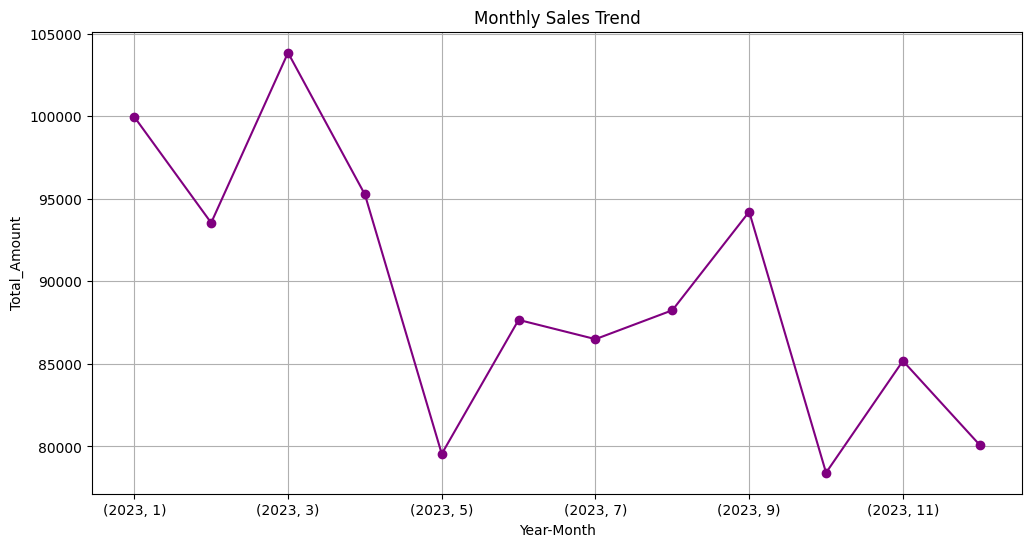

In [8]:
# 연도와 월 추출
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# 월별 Total_Amount 합계
monthly_sales = df.groupby(['Year', 'Month'])['Total_Amount'].sum()

# 시각화
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total_Amount')
plt.grid()
plt.show()

### 5. 회귀분석 및 회귀진단
#### 요구사항
1. `Quantity`를 독립변수, `Total_Amount`를 종속변수로 사용하여 단순 선형 회귀 모델을 생성하시오.
2. 회귀 계수와 \( R^2 \) 값을 계산하시오.
3. 잔차의 정규성을 Q-Q Plot으로 확인하시오.
4. 잔차와 예측값 간의 관계를 산점도로 나타내고, 결과를 해석하시오.

Coefficient: 22.29907179755735
Intercept: 2.863978418431145
R^2 Score: 0.6028427912835151


<Figure size 800x600 with 0 Axes>

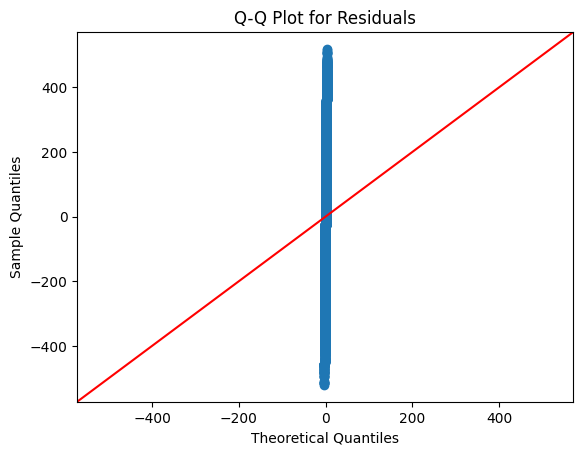

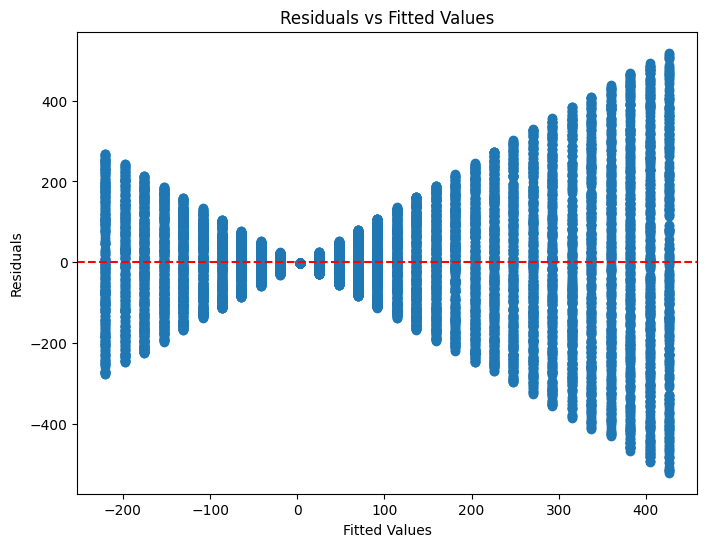

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

# 회귀 분석
X = df[['Quantity']]
y = df['Total_Amount']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# 회귀 계수 및 R^2
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
print(f"R^2 Score: {r2_score(y, y_pred)}")

# 잔차 분석
residuals = y - y_pred
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot for Residuals') 
plt.show()

# 정규 확률도(정규 분포로 가정한 qqplot)의 일반화 버전이 qqplot
# 45도에 가깝게 나오지 않으므로 정규분포를 따르지 않음

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# 잔차의 분포를 살펴보면 예측값이 증가함에 따라 잔차가 증가하는 '패턴'이 발견됨
# 등분산성 위배

__________
# 이제 과제 시작!

### 1. 데이터 로드
#### 요구사항
- 주어진 `online_retail.csv` 파일을 불러오세요.
- 데이터를 확인하고, 컬럼 정보를 출력하세요.

In [ ]:
# 1. 데이터 로드
import pandas as pd
df = pd.read_csv(r'C:\Users\njh45\OneDrive\바탕 화면\TOBIGS_23기\1주차\week1_EDA_data.csv')

# 데이터 확인
# TODO: 데이터의 상단 몇 개 행을 출력하는 코드를 작성하세요.
## table 형식이 편하니까 그냥 전체 출력 했습니다.
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,I07271,S089,Product 67,12,2023-09-20,17.305292,C0320,Australia
1,I00861,S095,Product 4,12,2023-05-31,34.734999,C0246,UK
2,I05391,S041,Product 96,-6,2023-07-31,36.367197,C0213,Australia
3,I05192,S081,Product 1,-8,2023-07-11,34.778332,C0443,France
4,I05735,S047,Product 34,18,2023-08-31,11.037961,C0276,Australia
...,...,...,...,...,...,...,...,...
9995,I04678,S046,Product 46,10,2023-02-12,-2.337636,C0241,Australia
9996,I02219,S059,Product 80,11,2023-03-23,3.917652,C0103,USA
9997,I01390,S070,Product 11,-3,2023-01-27,15.916445,C0297,Australia
9998,I04277,S008,Product 49,9,2023-10-31,8.130918,C0495,USA


### 2. 데이터 전처리
#### 요구사항
1. 결측치가 포함된 데이터를 처리하시오.
2. 이상치를 탐지하고 제거하시오:
   - `Quantity`와 `UnitPrice`에서 IQR 방식을 사용하세요.
3. 새로운 열 `Total_Amount`를 추가하시오:
   - `Total_Amount = Quantity × UnitPrice`

In [14]:
# 결측치 처리
# TODO: 결측치가 포함된 데이터를 확인하고 제거하는 코드를 작성하세요.
print("결측치 개수:\n", df.isnull().sum())
df.dropna(inplace=True)


# 이상치 처리
# TODO: Quantity와 UnitPrice 변수에 대한 IQR을 출력하는 함수를 만드세요(e. def iqr(변수명))
def iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    return Q1, Q3, IQR


# TODO: Quantity와 UnitPrice 변수를 제작한 함수에 넣어 결과를 출력하세요.5)5)
Q1_quantity, Q3_quantity, IQR_quantity = iqr(df['Quantity'])
Q1_unitprice, Q3_unitprice, IQR_unitprice = iqr(df['UnitPrice'])

# Total_Amount 열 생성
df['Total_Amount'] = df['Quantity'] * df['UnitPrice']

df

결측치 개수:
 InvoiceNo       0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID      0
Country         0
Total_Amount    0
dtype: int64


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount
0,I07271,S089,Product 67,12,2023-09-20,17.305292,C0320,Australia,207.663508
1,I00861,S095,Product 4,12,2023-05-31,34.734999,C0246,UK,416.819989
2,I05391,S041,Product 96,-6,2023-07-31,36.367197,C0213,Australia,-218.203182
3,I05192,S081,Product 1,-8,2023-07-11,34.778332,C0443,France,-278.226653
4,I05735,S047,Product 34,18,2023-08-31,11.037961,C0276,Australia,198.683307
...,...,...,...,...,...,...,...,...,...
9995,I04678,S046,Product 46,10,2023-02-12,-2.337636,C0241,Australia,-23.376357
9996,I02219,S059,Product 80,11,2023-03-23,3.917652,C0103,USA,43.094167
9997,I01390,S070,Product 11,-3,2023-01-27,15.916445,C0297,Australia,-47.749335
9998,I04277,S008,Product 49,9,2023-10-31,8.130918,C0495,USA,73.178259


### 3. 기술통계 및 EDA
#### 요구사항
1. `UnitPrice`와 `Quantity`의 기술통계를 계산하시오.
2. `Country`별 `Total_Amount`의 합계를 계산하고, 상위 5개 국가를 출력하시오.
3. 다음 내용을 시각화하시오:
   - `UnitPrice`의 분포를 히스토그램으로 나타내기.
   - `Country`별 `Total_Amount`를 막대 그래프로 시각화하기.

기술통계:
           UnitPrice      Quantity
count  10000.000000  10000.000000
mean      22.457582      4.681100
std       15.917561      8.649629
min       -4.990898    -10.000000
25%        8.788993     -3.000000
50%       22.367911      5.000000
75%       36.291530     12.000000
max       49.994483     19.000000
상위 5개 국가:
 Country
France       231937.087319
Germany      220825.672623
UK           210195.166526
Australia    207078.422872
USA          202445.284760
Name: Total_Amount, dtype: float64


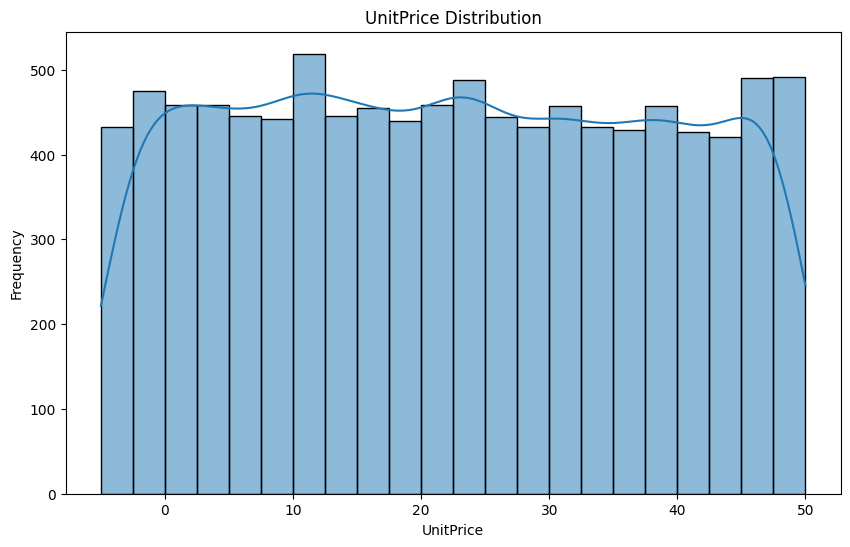

In [20]:
# 기술통계
# TODO: UnitPrice와 Quantity의 기술통계를 계산하는 코드를 작성하세요.
print("기술통계:\n", df[['UnitPrice', 'Quantity']].describe())

# Country별 Total_Amount 합계
# TODO: Country별 Total_Amount를 계산하고, 상위 5개 국가를 출력하는 코드를 작성하세요.
country_sales = df.groupby('Country')['Total_Amount'].sum().sort_values(ascending=False).head(5)
print("상위 5개 국가:\n", country_sales)

# 히스토그램
# TODO: UnitPrice의 분포를 시각화하세요.
plt.figure(figsize=(10, 6))
sns.histplot(df['UnitPrice'], kde=True) # UnitPrice 분포
plt.title('UnitPrice Distribution')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.show()